In [32]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np

In [22]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


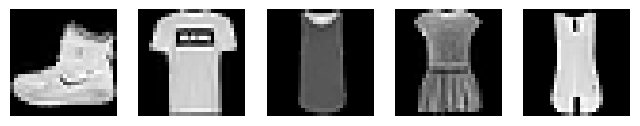

In [34]:
plt.figure(figsize=(8, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [30]:
x_test[0].shape

(28, 28)

Epoch 1/10


C:\Users\sangouda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 - 6s - 15ms/step - accuracy: 0.5462 - loss: 1.3313 - val_accuracy: 0.7031 - val_loss: 0.8472
Epoch 2/10
375/375 - 2s - 5ms/step - accuracy: 0.7353 - loss: 0.7355 - val_accuracy: 0.7599 - val_loss: 0.6532
Epoch 3/10
375/375 - 2s - 5ms/step - accuracy: 0.7691 - loss: 0.6260 - val_accuracy: 0.7783 - val_loss: 0.6030
Epoch 4/10
375/375 - 2s - 5ms/step - accuracy: 0.7888 - loss: 0.5783 - val_accuracy: 0.7958 - val_loss: 0.5584
Epoch 5/10
375/375 - 2s - 5ms/step - accuracy: 0.8041 - loss: 0.5444 - val_accuracy: 0.8075 - val_loss: 0.5333
Epoch 6/10
375/375 - 2s - 5ms/step - accuracy: 0.8144 - loss: 0.5193 - val_accuracy: 0.8172 - val_loss: 0.5155
Epoch 7/10
375/375 - 2s - 5ms/step - accuracy: 0.8231 - loss: 0.4985 - val_accuracy: 0.8233 - val_loss: 0.4954
Epoch 8/10
375/375 - 2s - 6ms/step - accuracy: 0.8292 - loss: 0.4805 - val_accuracy: 0.8288 - val_loss: 0.4792
Epoch 9/10
375/375 - 2s - 5ms/step - accuracy: 0.8357 - loss: 0.4648 - val_accuracy: 0.8280 - val_loss: 0.4709
Epoch 10/10

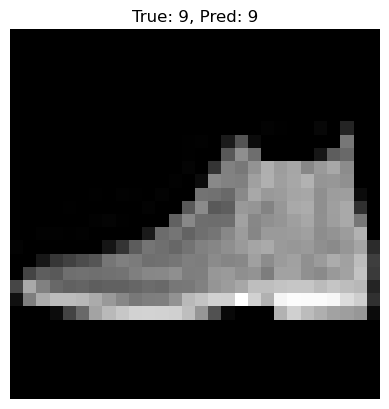

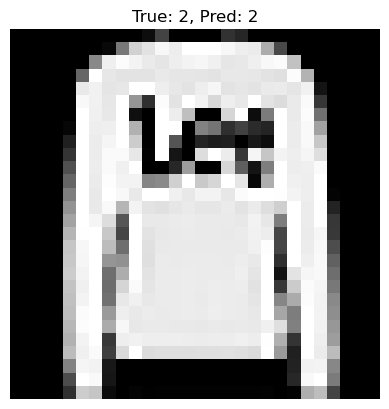

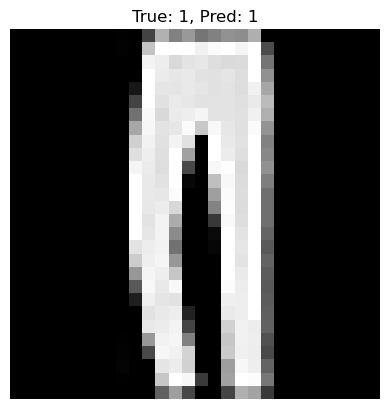

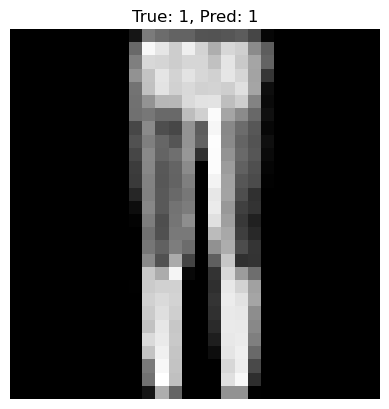

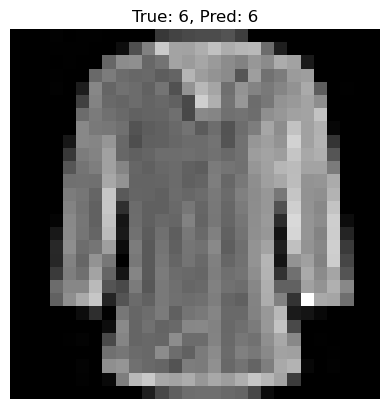

In [33]:

# 2. Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# 3. Reshape if needed — for ANN we flatten anyway
# x_train shape: (60000, 28, 28)

# 4. Convert labels to one-hot encoding
num_classes = 10
y_train_ohe = to_categorical(y_train, num_classes)
y_test_ohe  = to_categorical(y_test, num_classes)

# 5. Build simple ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# 6. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Train
history = model.fit(x_train, y_train_ohe,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

# 8. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_ohe, verbose=2)
print("Test accuracy:", test_acc)

# 9. Display some predictions
preds = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(preds[i])}")
    plt.axis('off')
    plt.show()